In [1]:
from db import DB
from service import Service
ser = Service()
df = ser.get_df(1)

In [2]:
df.describe()

,patient_id,anL1,anL2,anL3,anR1,anR2,anR3,R1,R2,R3,L1,L2,L3
count,401.0,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,1.0,0.029925,0.029925,0.029925,0.029925,0.029925,0.029925,623.815461,488.371571,542.845387,599.625935,122.201995,610.907731
std,0.0,0.170594,0.170594,0.170594,0.170594,0.170594,0.170594,469.862853,382.462860,490.688018,482.773518,125.026024,488.550165
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,18.000000,18.000000,18.000000,18.000000,17.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,27.000000,25.000000,29.000000,29.000000,27.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1023.000000,586.000000,908.000000,1023.000000,54.000000,1023.000000
75%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1023.000000,847.000000,1023.000000,1023.000000,214.000000,1023.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000


In [3]:
import matplotlib.pyplot as plt

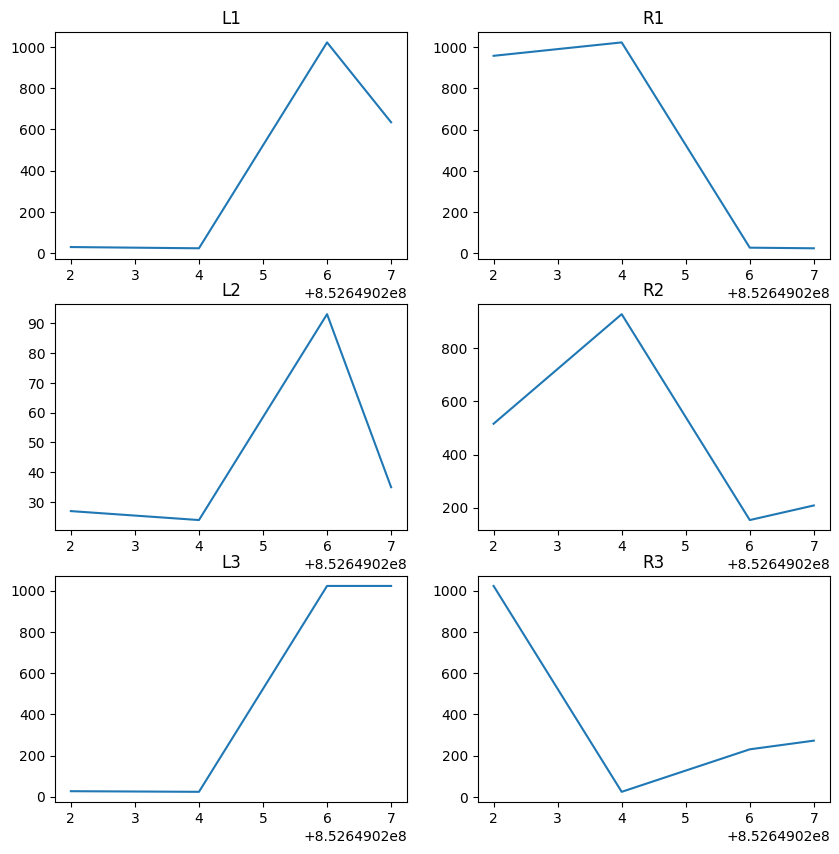

In [24]:
def plot(df):
    fig, ax = plt.subplots(3,2, figsize=(10,10), dpi=100)
    for i, s in enumerate(['L1','R1', 'L2', 'R2', 'L3', 'R3']):
        ax[i // 2, i % 2].plot(df.index, df[s], label=s)
        ax[i // 2, i % 2].plot(df.index[df['an' + s] == True],
                                df[s][df['an' + s] == True],  color='red', lw=2)
        ax[i // 2, i % 2].set_title(s)
    return fig

plot(df)

In [5]:
from scipy.fft import fft
import numpy as np

out = fft(df['L1'].values)
print(out)

[ 2.40450000e+05-0.00000000e+00j -2.52744685e+04+4.02651035e+04j
 -1.57630579e+03-3.07405733e+04j  1.49191772e+04-1.14618485e+03j
 -2.22952506e+03+1.67789049e+04j  3.96595021e+00+1.33059336e+04j
 -1.81569632e+04-6.80040316e+02j  6.68040262e+03-5.14189997e+03j
  2.82550895e+03-1.52574090e+04j  1.16170310e+04+1.31081938e+04j
  8.70229140e+03-6.63686455e+03j  9.59271316e+03-6.68164791e+03j
 -2.44588728e+03-1.32144136e+04j  1.16909159e+04+8.86731679e+03j
  2.86566482e+03-3.43381642e+03j  8.06484515e+03+1.35922784e+04j
  4.94848023e+03+3.53629536e+03j -9.23386697e+00+7.90187985e+03j
  9.58778879e+03+1.03185875e+04j  9.69791155e+03-1.07881461e+04j
 -8.75399425e+03-3.71803164e+03j -2.91983340e+03-1.22143223e+04j
 -3.62067950e+03+4.67186935e+03j  7.88129802e+03-3.93152499e+03j
  6.54515695e+03-2.96395650e+02j  1.38920363e+03-1.36825561e+04j
 -3.18110489e+03-1.11322411e+03j -1.28652514e+03-6.46069898e+03j
  2.75671643e+03-7.61792741e+03j -3.54783000e+03-1.29394908e+04j
 -1.86808327e+04-4.652934

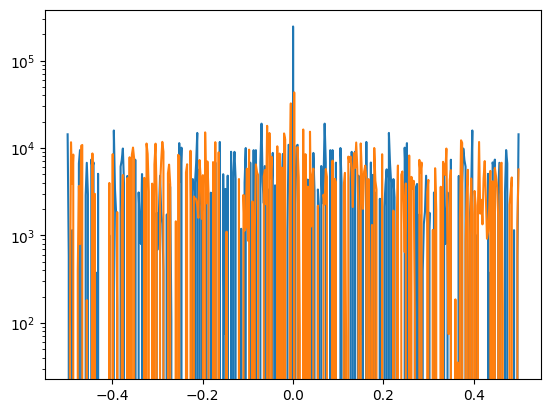

In [6]:
from scipy.fft import fft, fftfreq, fftshift
import matplotlib.pyplot as plt

t = np.arange(len(df.index))
sp = fftshift(fft(df['L3'].values))
freq = fftshift(fftfreq(t.shape[-1]))

plt.plot(freq, sp.real, freq, sp.imag)
plt.yscale('log')
#plt.xlim(-0.01, 0.01)
plt.show()

In [7]:
import ipywidgets as w
sA1 = w.FloatSlider(min=0, max=10, step=1, description="time window", value=1.0)
sA2 = w.FloatSlider(min=0, max=10, step=1, description="moment", value=1.0)

In [8]:
gb = w.GridBox(layout=w.Layout(grid_template_columns="320px 50px"))
gb.children = [sA1, sA2]
out = w.Output()

time_window = 1.0
moment = 1.0
id = 1

def on_change(arg):
    A = min([sA1.value + sA2.value])
    with out:
        out.clear_output()
        plt.xlim(sA2.value, sA2.value + sA1.value)
        df = ser.get_df(id)
        plt.plot(df.index, df['L1'], label='L1')

#sA1.observe(on_change, names='value')
#sA2.observe(on_change, names='value')
#on_change(1)
#w.VBox(children =[gb, out])

160 164
4


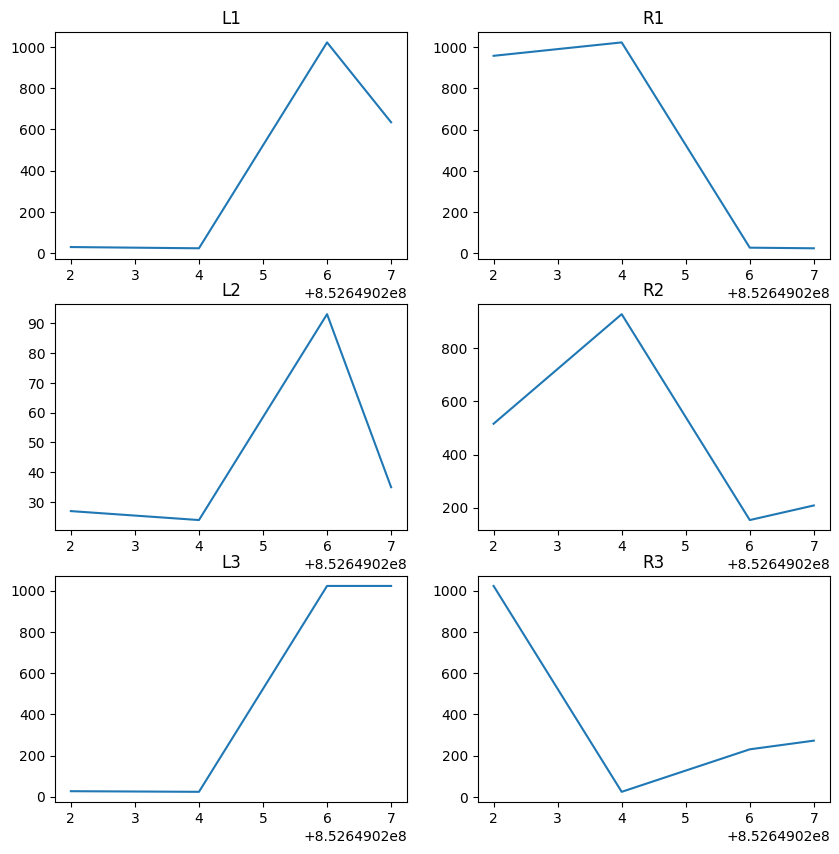

In [23]:
from math import floor
ser = Service()
df = ser.get_df(1)

window_offset = 0.4
window_frame = 0.02

start = floor(window_offset * len(df))
end = start + floor(window_frame * (len(df) - start))
df = df.iloc[start:end]
print(str(start) + " " +  str(end))
print(len(df))
plot(df)
